In [2]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from copy import deepcopy


# nice big figures
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["figure.dpi"] = 300

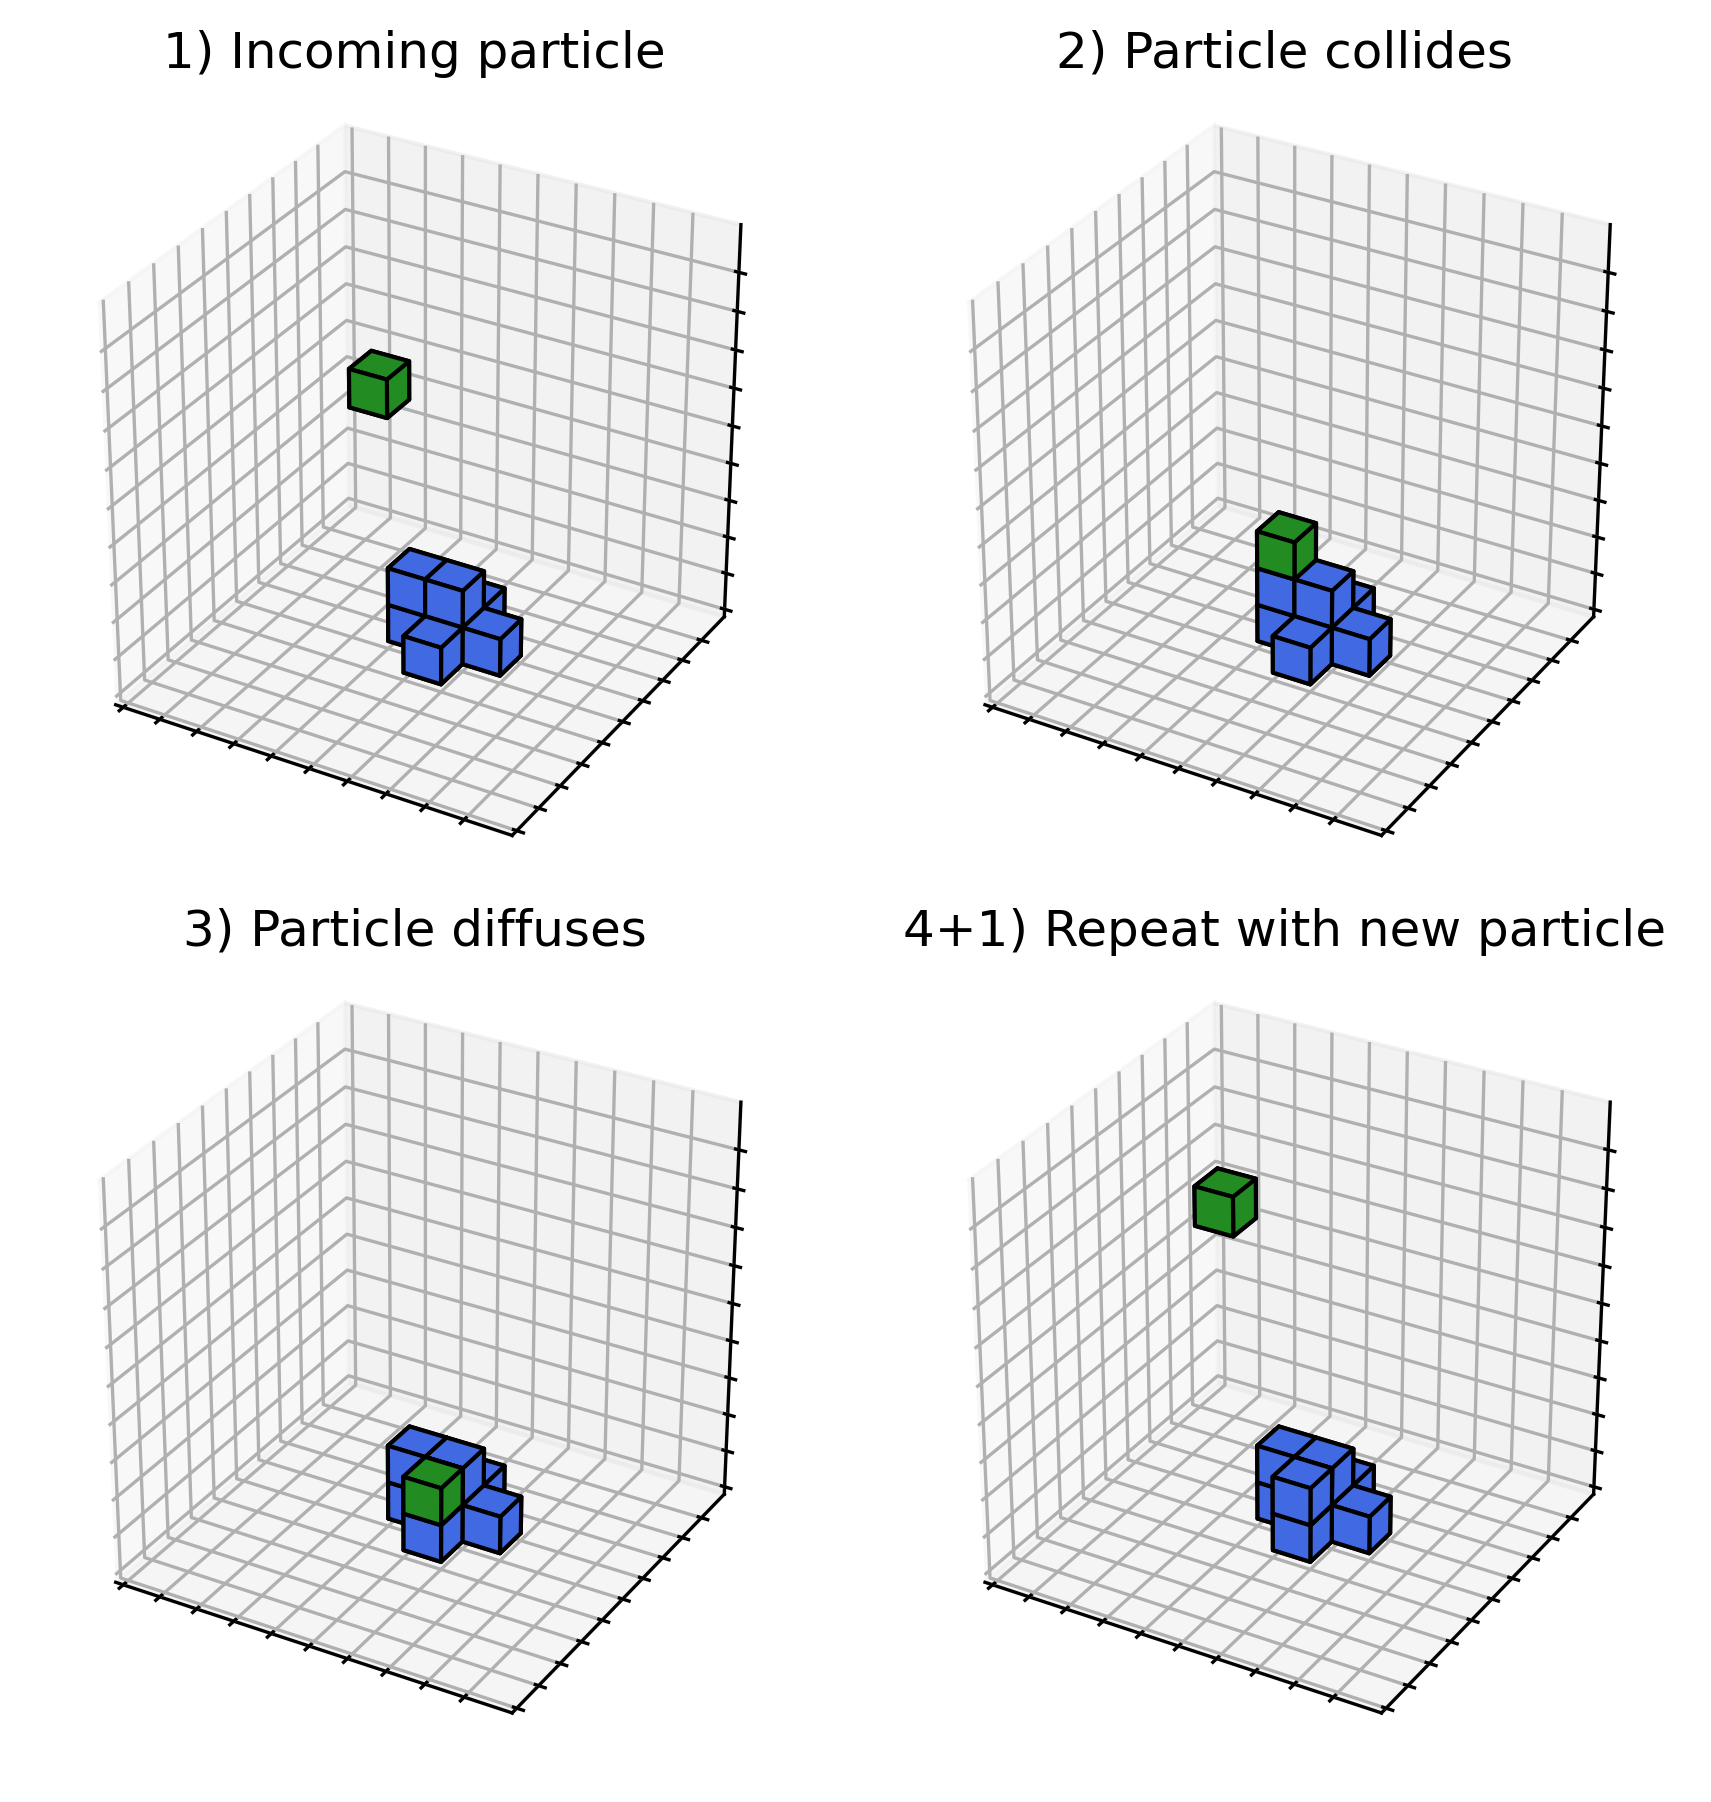

In [3]:
# some functions with thanks to ImportanceOfBeingErnest on Stack Exchange: 
# https://stackoverflow.com/questions/42611342/representing-voxels-with-matplotlib
def cuboid_data(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)): sizes=[(1,1,1)]*len(positions)
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data(p, size=s) )
    return Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6, axis=0), **kwargs)

# existing structure
X = [[5, 5, 0],
    [4, 5, 0],
    [6, 5, 0],
    [5, 4, 0],
    [5, 6, 0],
    [5, 5, 1],
    [4, 5, 1]]

# create voxel lists for individual panels
inc = deepcopy(X)
inc.append([3,5,6])
col = deepcopy(X)
col.append([4,5,2])
dif = deepcopy(X)
dif.append([5, 4, 1])
new = deepcopy(X)
new.append([5, 4, 1])
new.append([3, 4, 8])

# color lists
colors = ['royalblue'] * len(X)
colors.append('forestgreen')
colors2 = ['royalblue'] * (len(X)+1)
colors2.append('forestgreen')

# create figure
fig, ax = plt.subplots(2, 2, figsize=(6,6), subplot_kw={'projection': '3d'})

# create cube collections for panels
pc = plotCubeAt(inc, colors=colors, edgecolor='k')
ax[0,0].add_collection3d(pc)
pc = plotCubeAt(col, colors=colors, edgecolor='k')
ax[0,1].add_collection3d(pc)
pc = plotCubeAt(dif, colors=colors, edgecolor='k')
ax[1,0].add_collection3d(pc)
pc = plotCubeAt(new, colors=colors2, edgecolor='k')
ax[1,1].add_collection3d(pc)
ax[0,0].set_title('1) Incoming particle')
ax[0,1].set_title('2) Particle collides')
ax[1,0].set_title('3) Particle diffuses')
ax[1,1].set_title('4+1) Repeat with new particle')
plt.tight_layout() # must be called before changing axes or a bug(?) screws it up
for x in ax:
    for a in x:
        # doesn't seem to do anything but should remove the spine
        for spine in a.spines.values():
            spine.set_visible(False)
            spine.set_color('none')
        # get rid of many unnecessary axis elements
        a.set_xlim([0, 10])
        a.set_ylim([0, 10])
        a.set_zlim([0, 10])
        a.set_xticks(range(0, 10))
        a.set_yticks(range(0, 10))
        a.set_zticks(range(0, 10))
        a.set_xticklabels('')
        a.set_yticklabels('')
        a.set_zticklabels('')
        a.set_box_aspect([1,1,1]) # sets projection to equal (technically a work-around because matplotlib doesn't directly support it in this version)
plt.show()
fig.savefig('images/monte_carlo.png')

# 2D line traversal process

Bresenham points: [(1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6), (8, 6), (9, 7), None, None, None, None, None, None]


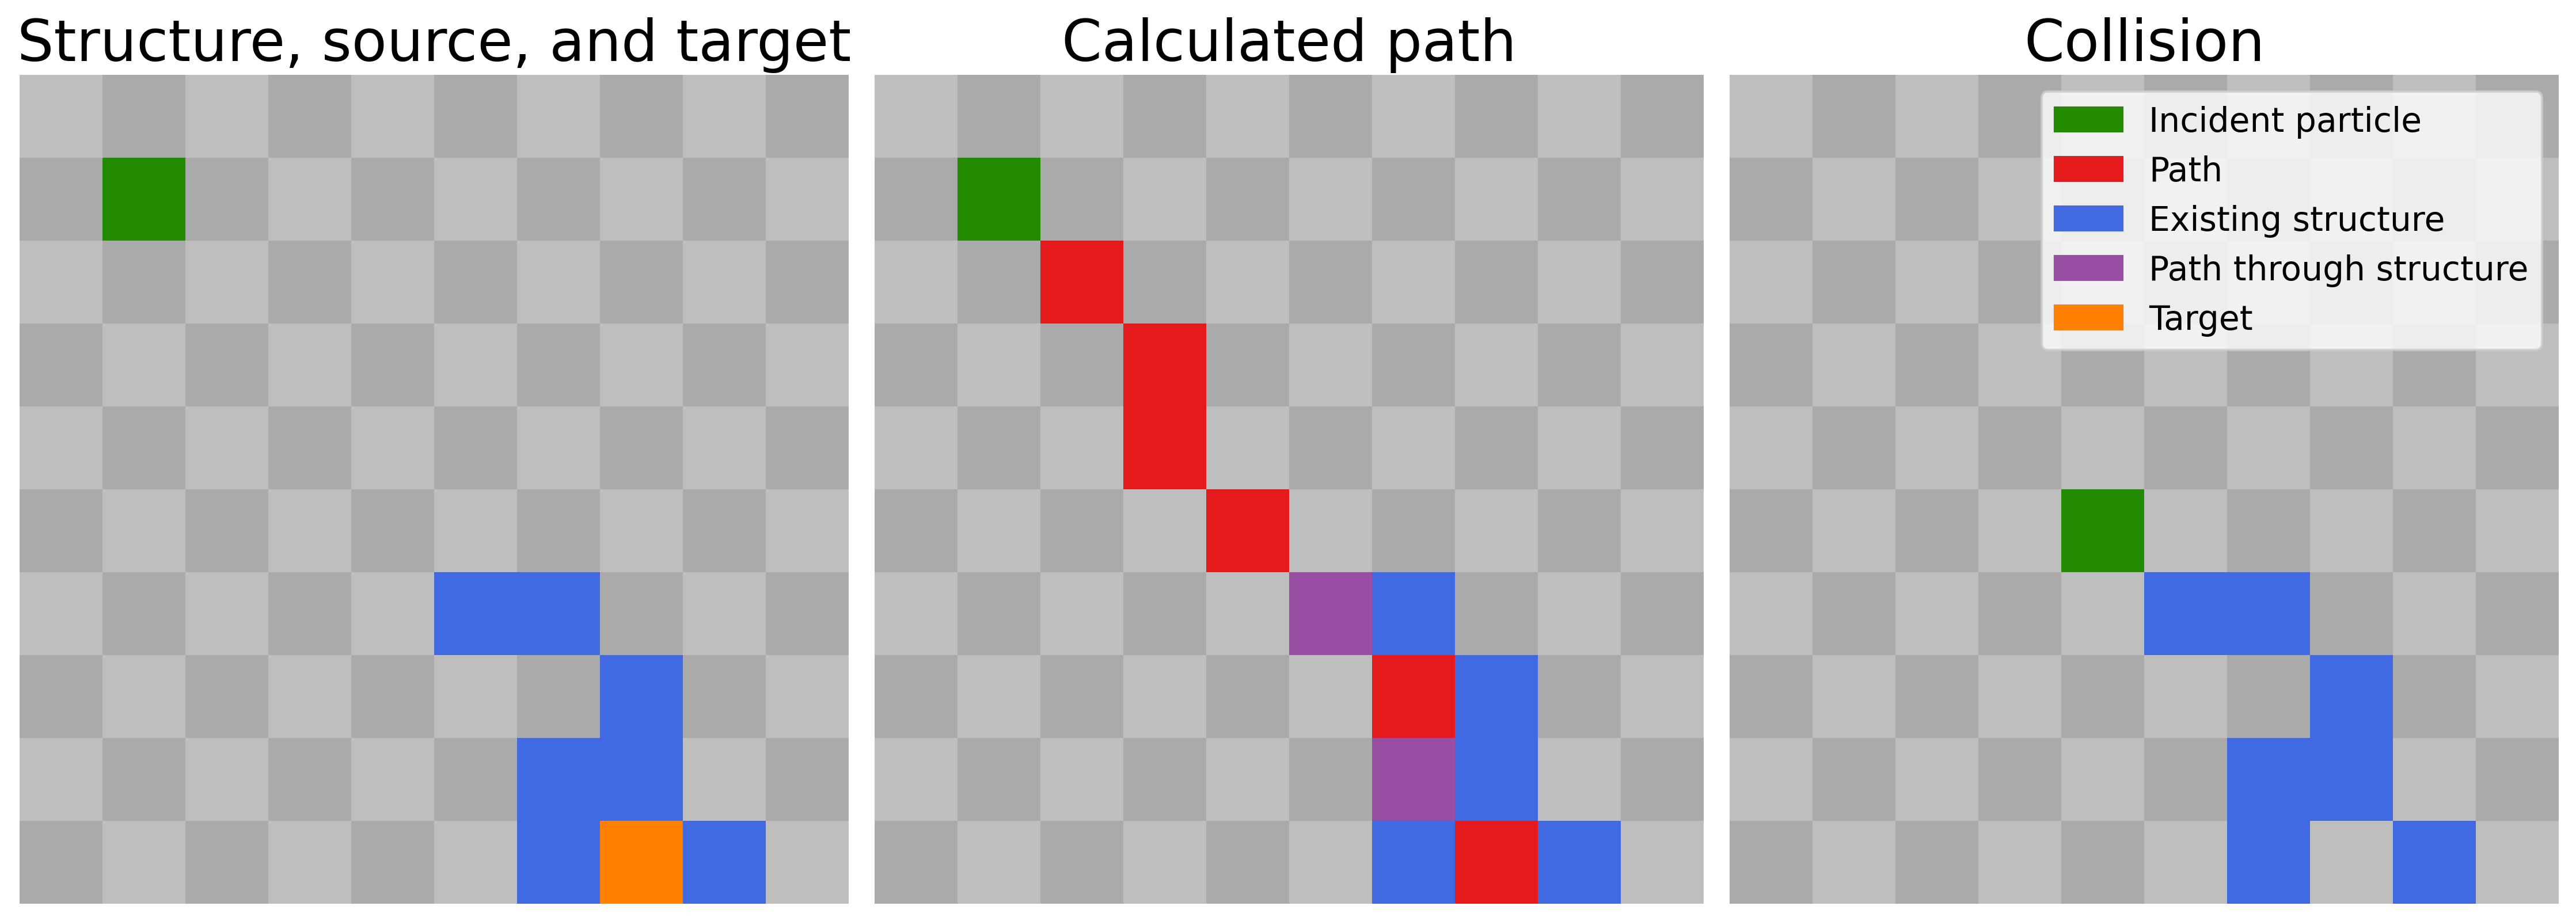

In [45]:
from PIL import Image
from utils import getLinePointsP
import matplotlib.patches as mpatches


# pixel maps for individual panels
zeros = np.zeros((10, 10)).astype(np.uint8)
grid = np.zeros((10, 10)).astype(np.uint8)
line = np.zeros((10, 10)).astype(np.uint8)
land = np.zeros((10, 10)).astype(np.uint8)

# prexisting structure
structure = [
             [8, 9],
             [6, 9],
             [7, 8],
             [6, 8],
             [7, 7],
             [6, 6],
             [5, 6]]

# get Bresenham points
points = getLinePointsP([1, 1], [9, 7])
print('Bresenham points: {}'.format(points))
for p in points:
    if p is None:
        break
    line[p[0], p[1]] = 2

# draw structure
# for p in structure:
#     grid[p[1], p[0]] = 3
#     land[p[1], p[0]] = 3
#     if line[p[1], p[0]] == 0:
#         line[p[1], p[0]] = 3
#     elif line[p[1], p[0]] == 2:
#         line[p[1], p[0]] = 4
for i in range(10):
    for j in range(10):
        if [i,j] in structure:
            land[j,i] = 3
            grid[j,i] = 3
            if line[j,i] == 0:
                line[j,i] = 3
            else:
                line[j,i] = 4
        elif j % 2 == i % 2:
            land[j,i] = 7
            grid[j,i] = 7
            if line[j,i] == 0:
                line[j,i] = 7
        else:
            land[j,i] = 8
            grid[j,i] = 8
            if line[j,i] == 0:
                line[j,i] = 8

# draw current particle and target
grid[1, 1] = 1
grid[9, 7] = 5
line[1, 1] = 1
land[5, 4] = 1

# palette for drawing
palette = [0, 0, 0,
           34, 139, 1,
           228, 26, 28,
           65, 105, 225,
           152, 78, 163, 
           255, 127, 0, 
           255, 255, 51,
           190, 190, 190,
           170, 170, 170]
palette = palette + [0]*(768-len(palette)) # zero-pad palette

# make palette images for each panel
pi0 = Image.fromarray(zeros, 'P')
pi0.putpalette(palette)
pi1 = Image.fromarray(grid, 'P')
pi1.putpalette(palette)
pi2 = Image.fromarray(line, 'P')
pi2.putpalette(palette)
pi3 = Image.fromarray(land, 'P')
pi3.putpalette(palette)

fig, ax = plt.subplots(1, 3, figsize=(15,6))
for a in ax:
    a.set_axis_off()
        
ax[0].imshow(pi1)
ax[0].set_title("Structure, source, and target", fontsize=24)
ax[1].imshow(pi2)
ax[1].set_title("Calculated path", fontsize=24)
ax[2].imshow(pi3)
ax[2].set_title("Collision", fontsize=24)
colors = [np.array(palette[3:6])/255, np.array(palette[6:9])/255, np.array(palette[9:12])/255, np.array(palette[12:15])/255, np.array(palette[15:18])/255]
labels = ["Incident particle", "Path", "Existing structure", "Path through structure", "Target"]
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=patches, fontsize=14, loc=1)
plt.tight_layout()
plt.show()

# Diffusion process

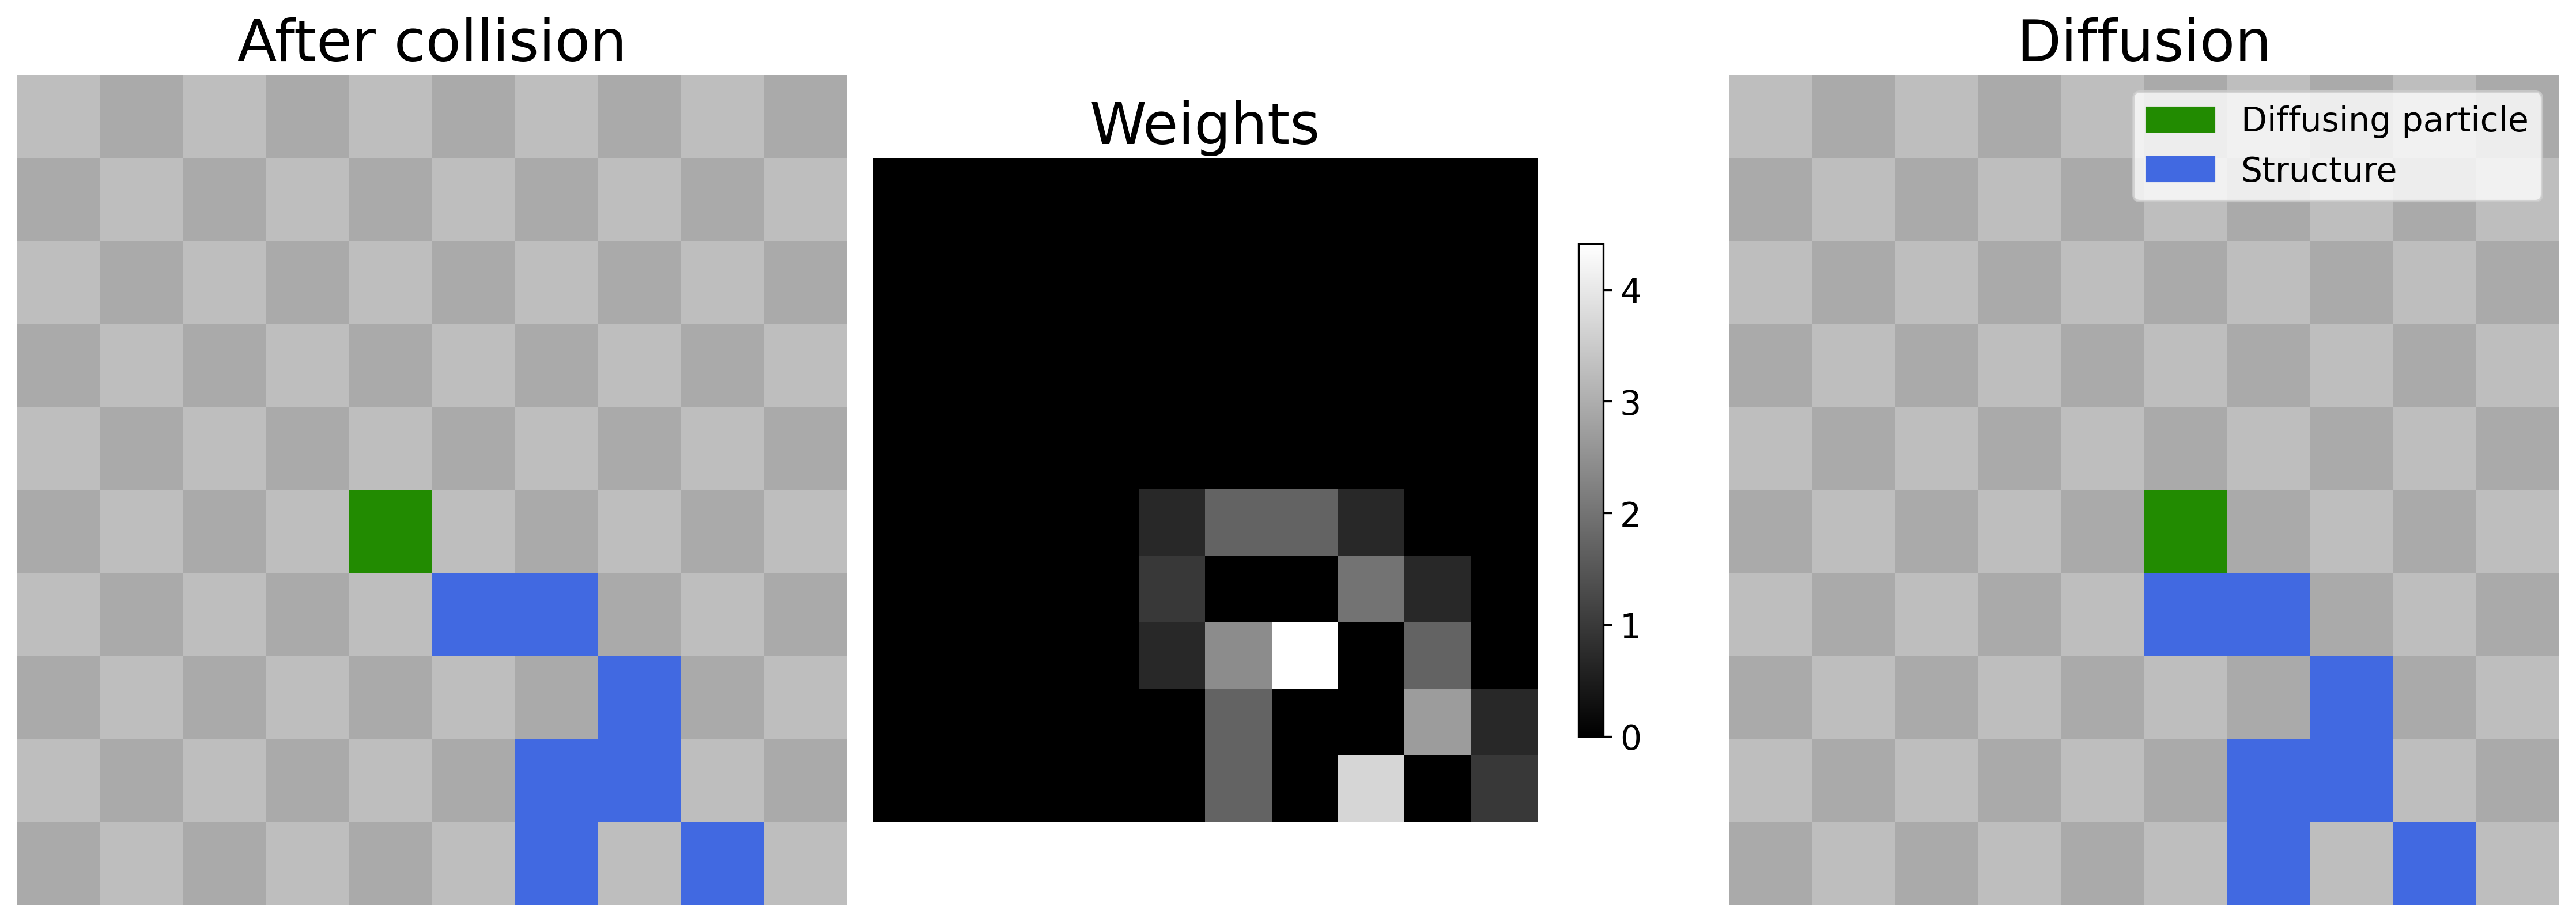

In [33]:
land = np.zeros((10, 10)).astype(np.uint8)
ener = np.zeros((10, 10)).astype(np.float32)
diff = np.zeros((10, 10)).astype(np.uint8)

# prexisting structure
structure = [
             [8, 9],
             [6, 9],
             [7, 8],
             [6, 8],
             [7, 7],
             [6, 6],
             [5, 6]]
# draw structure
for p in structure:
    land[p[1], p[0]] = 3
    diff[p[1], p[0]] = 3
for i in range(10):
    for j in range(10):
        if [i,j] in structure:
            land[j,i] = 3
            diff[j,i] = 3
        elif j % 2 == i % 2:
            land[j,i] = 7
            diff[j,i] = 7
        else:
            land[j,i] = 8
            diff[j,i] = 8

# draw diffusing particle
land[5, 4] = 1
diff[5, 5] = 1

# calculate energies
for i in range(ener.shape[1]):
    for j in range(ener.shape[0]):
        if land[j,i] == 3:
            continue
        for di in [-1, 0, 1]:
            ii = (i + di)
            if ii < 0 or ii > 9:
                continue
            for dj in [-1, 0, 1]:
                jj = j + dj
                if jj < 0 or jj > 9:
                    continue
                if land[jj,ii] == 3:
                    if di == 0 or dj == 0:
                        ener[j,i] += 1
                    elif di !=0 and dj != 0:
                        ener[j,i] += 1/1.414

# palette for drawing
palette = [0, 0, 0,
           34, 139, 1,
           228, 26, 28,
           65, 105, 225,
           152, 78, 163, 
           255, 127, 0, 
           255, 255, 51,
           190, 190, 190,
           170, 170, 170]
palette = palette + [0]*(768-len(palette)) # zero-pad palette

# make palette images for each panel
pi0 = Image.fromarray(zeros, 'P')
pi0.putpalette(palette)
pdiff = Image.fromarray(diff, 'P')
pdiff.putpalette(palette)
pland = Image.fromarray(land, 'P')
pland.putpalette(palette)

fig, ax = plt.subplots(1, 3, figsize=(15,6))
for a in ax:
    a.set_axis_off()
        
ax[0].imshow(pland)
ax[0].set_title("After collision", fontsize=24)
pos = ax[1].imshow(ener, cmap='gray')
ax[1].set_title("Weights", fontsize=24)
cbar = fig.colorbar(pos, ax=ax[1], shrink=0.5, pad=0.05)
cbar.ax.tick_params(labelsize=14)
ax[2].imshow(pdiff)
ax[2].set_title("Diffusion", fontsize=24)
colors = [np.array(palette[3:6])/255, np.array(palette[9:12])/255]
labels = ["Diffusing particle", "Structure"]
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
ax[2].legend(handles=patches, fontsize=14, loc=1)
plt.tight_layout()
plt.show()

In [ ]:
grid = loadGrid2D("SCTF_Si_L1024_Th85.5_D20_N65536_1655487930.npy")
surface = surfaceFromGrid(grid, L, height)
